In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
file=[]

clusters_list = os.listdir("./C50")


In [3]:

file_number = []
dataset = []
target=[]
for i in range(0,len(clusters_list)):
    y = clusters_list[i]
    test = os.listdir('./C50/'+y)
    file_number.append(test)
    
    
for r in range(0,len(clusters_list)):
    for u in range(0,len(file_number)):
        with open('./C50/'+ clusters_list[r] + '/' + file_number[r][u], 'r' ) as t:
            b = t.read()
            
            dataset.append(b)
            target.append(clusters_list[r])
    
    
    
    

In [4]:
print(len(dataset))
print(len(target))

2500
2500


In [5]:
dataset = pd.DataFrame(dataset)
target = pd.DataFrame(target)

In [6]:
dataset[1] = target[0]
allNewsDf = dataset

In [7]:
allNewsDf.columns = ['text', 'class']
allNewsDf

,text,class
0,The Internet may be overflowing with new techn...,AaronPressman
1,The U.S. Postal Service announced Wednesday a ...,AaronPressman
2,Elementary school students with access to the ...,AaronPressman
3,An influential Internet organisation has backe...,AaronPressman
4,An influential Internet organisation has backe...,AaronPressman
...,...,...
2495,China's central bank chief has said that infla...,WilliamKazer
2496,"China ushered in 1997, a year it has hailed as...",WilliamKazer
2497,China issued tough new rules on the handling o...,WilliamKazer
2498,China will avoid bold moves in tackling its ai...,WilliamKazer


In [8]:
# 將文章轉換為TF-IDF向量
allCount = CountVectorizer().fit_transform(dataset['text'].tolist())
allTfidf = TfidfTransformer().fit_transform(allCount)

In [9]:
# 將原始TF-IDF降至2維
decomposition = TruncatedSVD(n_components=2).fit_transform(allTfidf)
allNewsDf["decomposition"] = decomposition.tolist()
allNewsDf["decomposition-0"] = allNewsDf["decomposition"].apply(lambda x: x[0])
allNewsDf["decomposition-1"] = allNewsDf["decomposition"].apply(lambda x: x[1])

In [10]:
kmeansStart = time.time()
allNewsDf["kmeans"] = KMeans(n_clusters=50).fit(allTfidf).labels_
kmeansEnd = time.time() - kmeansStart

In [11]:
hierarchicalStart = time.time()
allNewsDf["hierarchical"] = AgglomerativeClustering(n_clusters=50).fit(allTfidf.todense()).labels_
hierarchicalEnd = time.time() - hierarchicalStart

In [12]:
DBSCANStart = time.time()
allNewsDf["DBSCAN"] = DBSCAN(eps=0.8, min_samples=0.01).fit(allTfidf).labels_
DBSCANEnd = time.time() - DBSCANStart

In [13]:
decompositionKmeansStart = time.time()
allNewsDf["decompositionKmeans"] = KMeans(n_clusters=50).fit(decomposition).labels_
decompositionKmeansEnd = time.time() - decompositionKmeansStart

In [14]:
decompositionHierarchicalStart = time.time()
allNewsDf["decompositionHierarchical"] = AgglomerativeClustering(n_clusters=50).fit(decomposition).labels_
decompositionHierarchicalEnd = time.time() - decompositionHierarchicalStart

In [15]:
decompositionDBSCANStart = time.time()
allNewsDf["decompositionDBSCAN"] = DBSCAN(eps=0.003, min_samples=0.1).fit(decomposition).labels_
decompositionDBSCANEnd = time.time() - decompositionDBSCANStart

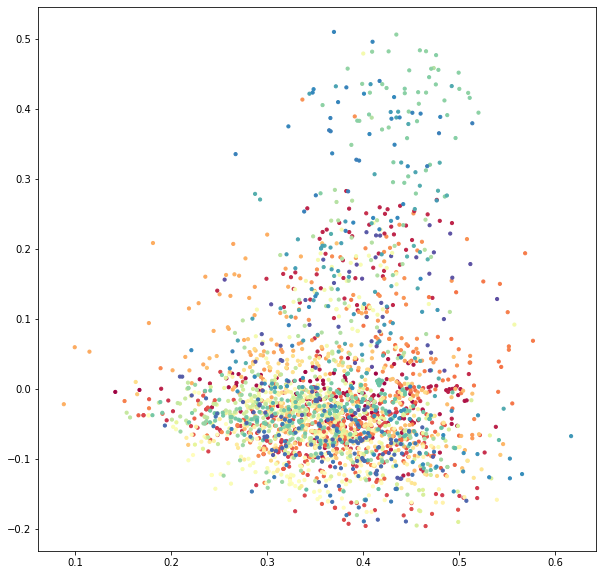

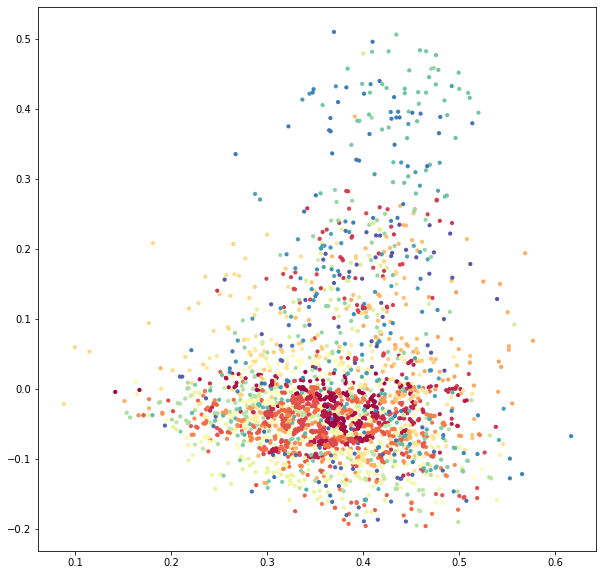

In [16]:
# %%time
plt.rcParams['figure.figsize'] = [10, 10]
pointSize = 10
pointEdgeSize = 1

# 原始資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["DBSCAN"], s=pointSize, linewidths=pointEdgeSize, cmap=plt.cm.Spectral)
plt.savefig("cluster-original.png", format="png")
plt.show()


# dbscan資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["decompositionDBSCAN"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-dbscan.png", format="png")
plt.show()

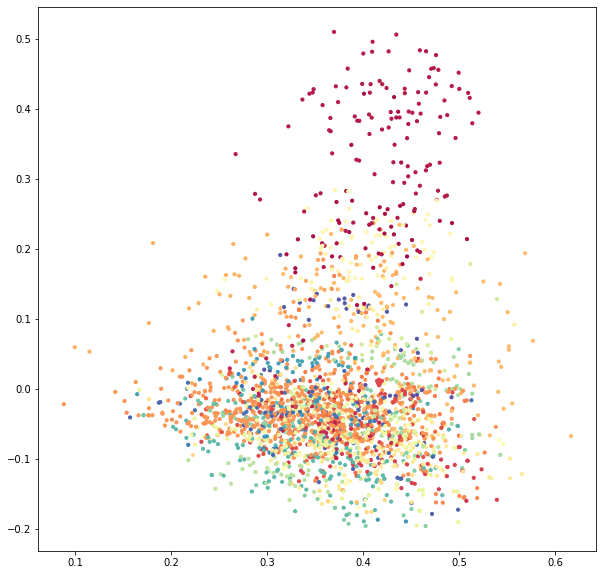

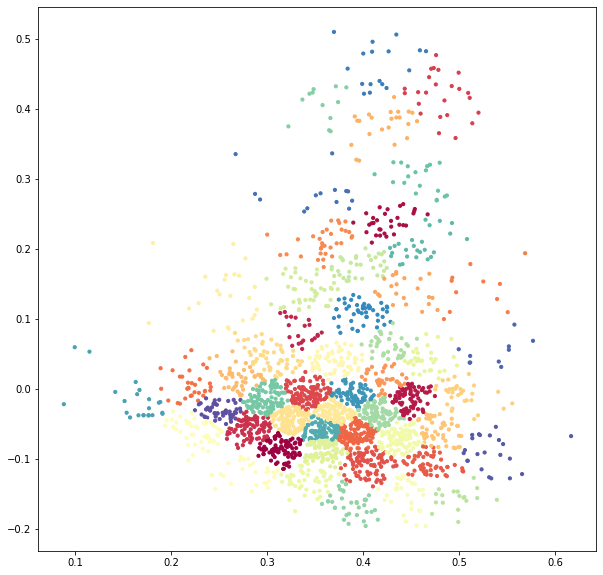

In [17]:
# kmeans原始資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["kmeans"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-kmeans.png", format="png")
plt.show()

# kmeans資料分布降維後
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["decompositionKmeans"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-kmeans.png", format="png")
plt.show()

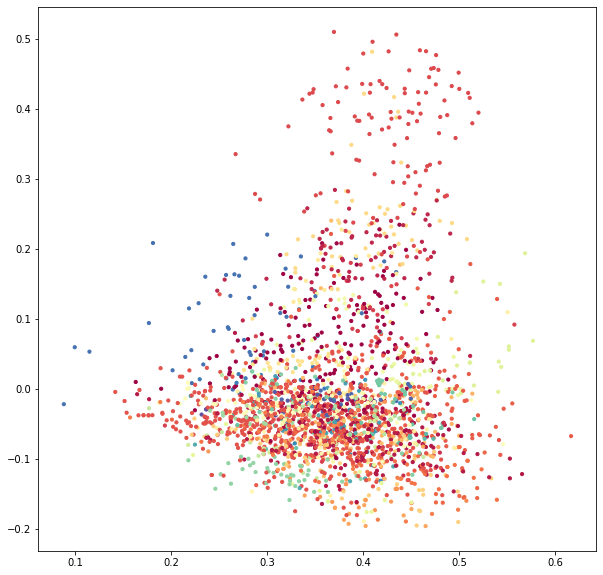

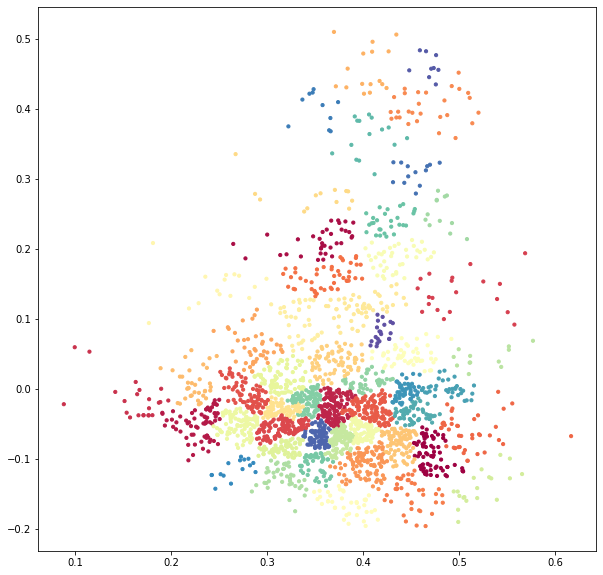

In [18]:

# hierarchical原始資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["hierarchical"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-hierarchical.png", format="png")
plt.show()


# hierarchical降維後資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["decompositionHierarchical"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-hierarchical.png", format="png")
plt.show()

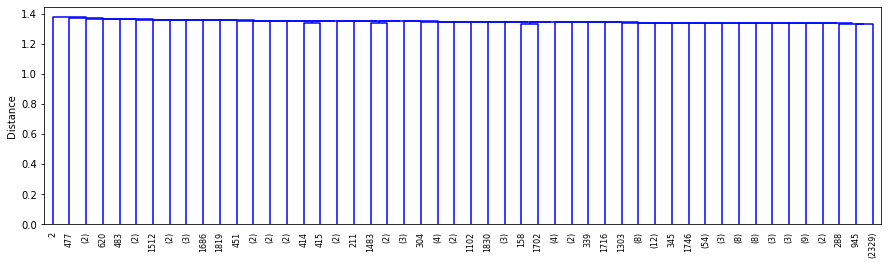

In [19]:
# 降維前的Dendrogram
plt.figure(figsize=(15, 4))
plt.ylabel("Distance")
dendrogram(hierarchy.linkage(allTfidf.todense(), "average"), truncate_mode="lastp", p=50)
plt.savefig("cluster-dendrogram(before decomposition).png", format="png")
plt.show()

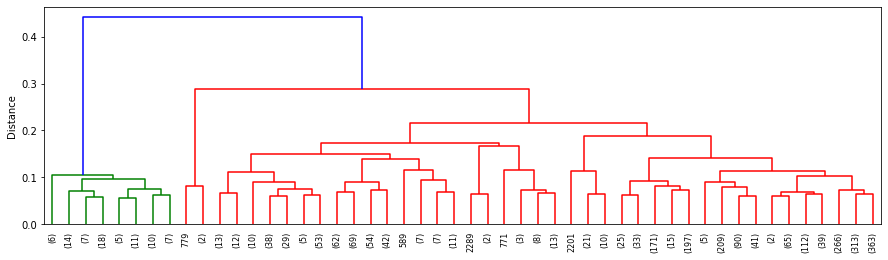

In [20]:
# 降維後的Dendrogram
plt.figure(figsize=(15, 4))
plt.ylabel("Distance")
dendrogram(hierarchy.linkage(decomposition, "average"), truncate_mode="lastp", p=50)
plt.savefig("cluster-dendrogram(agter decomposition).png", format="png")
plt.show()

In [21]:
purity = pd.DataFrame()

purity["kmeansMaxCount"] = allNewsDf.groupby(["class", "kmeans"], as_index=False).count().groupby("kmeans", as_index=False).max()["text"]
purity["kmeansClusterCount"] = allNewsDf.groupby("kmeans").count()["text"]
purity["kmeansPurity"] = purity["kmeansMaxCount"] / purity["kmeansClusterCount"]
purity["kmeansTotalPurity"] = sum(purity["kmeansPurity"] * purity["kmeansClusterCount"] / allNewsDf.shape[0])

purity["hierarchicalMaxCount"] = allNewsDf.groupby(["class", "hierarchical"], as_index=False).count().groupby("hierarchical", as_index=False).max()["text"]
purity["hierarchicalClusterCount"] = allNewsDf.groupby("hierarchical").count()["text"]
purity["hierarchicalPurity"] = purity["hierarchicalMaxCount"] / purity["hierarchicalClusterCount"]
purity["hierarchicalTotalPurity"] = sum(purity["hierarchicalPurity"] * purity["hierarchicalClusterCount"] / allNewsDf.shape[0])

dbscanPurity = pd.DataFrame()
dbscanPurity["DBSCANMaxCount"] = allNewsDf[allNewsDf["DBSCAN"] >= 0].groupby(["class", "DBSCAN"], as_index=False).count().groupby("DBSCAN", as_index=False).max()["text"]
dbscanPurity["DBSCANClusterCount"] = allNewsDf[allNewsDf["DBSCAN"] >= 0].groupby("DBSCAN").count()["text"]
dbscanPurity["DBSCANPurity"] = dbscanPurity["DBSCANMaxCount"] / dbscanPurity["DBSCANClusterCount"]
dbscanPurity["DBSCANTotalPurity"] = sum(dbscanPurity["DBSCANPurity"] * dbscanPurity["DBSCANClusterCount"] / allNewsDf.shape[0])
purity = purity.join(dbscanPurity)

purity["decompositionKmeansMaxCount"] = allNewsDf.groupby(["class", "decompositionKmeans"], as_index=False).count().groupby("decompositionKmeans", as_index=False).max()["text"]
purity["decompositionKmeansClusterCount"] = allNewsDf.groupby("decompositionKmeans").count()["text"]
purity["decompositionKmeansPurity"] = purity["decompositionKmeansMaxCount"] / purity["decompositionKmeansClusterCount"]
purity["decompositionKmeansTotalPurity"] = sum(purity["decompositionKmeansPurity"] * purity["decompositionKmeansClusterCount"] / allNewsDf.shape[0])

purity["decompositionHierarchicalMaxCount"] = allNewsDf.groupby(["class", "decompositionHierarchical"], as_index=False).count().groupby("decompositionHierarchical", as_index=False).max()["text"]
purity["decompositionHierarchicalClusterCount"] = allNewsDf.groupby("decompositionHierarchical").count()["text"]
purity["decompositionHierarchicalPurity"] = purity["decompositionHierarchicalMaxCount"] / purity["decompositionHierarchicalClusterCount"]
purity["decompositionHierarchicalTotalPurity"] = sum(purity["decompositionHierarchicalPurity"] * purity["decompositionHierarchicalClusterCount"] / allNewsDf.shape[0])

dbscanPurity = pd.DataFrame()
dbscanPurity["decompositionDBSCANMaxCount"] = allNewsDf[allNewsDf["decompositionDBSCAN"] >= 0].groupby(["class", "decompositionDBSCAN"], as_index=False).count().groupby("decompositionDBSCAN", as_index=False).max()["text"]
dbscanPurity["decompositionDBSCANClusterCount"] = allNewsDf[allNewsDf["decompositionDBSCAN"] >= 0].groupby("decompositionDBSCAN").count()["text"]
dbscanPurity["decompositionDBSCANPurity"] = dbscanPurity["decompositionDBSCANMaxCount"] / dbscanPurity["decompositionDBSCANClusterCount"]
dbscanPurity["decompositionDBSCANTotalPurity"] = sum(dbscanPurity["decompositionDBSCANPurity"] * dbscanPurity["decompositionDBSCANClusterCount"] / allNewsDf.shape[0])
purity = purity.join(dbscanPurity)

purity

,kmeansMaxCount,kmeansClusterCount,kmeansPurity,kmeansTotalPurity,hierarchicalMaxCount,hierarchicalClusterCount,hierarchicalPurity,hierarchicalTotalPurity,DBSCANMaxCount,DBSCANClusterCount,...,decompositionKmeansPurity,decompositionKmeansTotalPurity,decompositionHierarchicalMaxCount,decompositionHierarchicalClusterCount,decompositionHierarchicalPurity,decompositionHierarchicalTotalPurity,decompositionDBSCANMaxCount,decompositionDBSCANClusterCount,decompositionDBSCANPurity,decompositionDBSCANTotalPurity
0,1,3,0.333333,0.3948,19,187,0.101604,0.4032,1,1,...,0.142857,0.1868,11,68,0.161765,0.1792,1,1,1.000000,0.6536
1,15,46,0.326087,0.3948,17,39,0.435897,0.4032,1,1,...,0.193548,0.1868,9,35,0.257143,0.1792,1,2,0.500000,0.6536
2,47,107,0.439252,0.3948,38,212,0.179245,0.4032,1,1,...,0.093333,0.1868,8,70,0.114286,0.1792,1,1,1.000000,0.6536
3,24,43,0.558140,0.3948,17,68,0.250000,0.4032,2,2,...,0.190476,0.1868,11,130,0.084615,0.1792,1,2,0.500000,0.6536
4,38,49,0.775510,0.3948,11,24,0.458333,0.4032,1,1,...,0.134831,0.1868,3,22,0.136364,0.1792,1,1,1.000000,0.6536
5,22,54,0.407407,0.3948,31,53,0.584906,0.4032,1,1,...,0.750000,0.1868,6,20,0.300000,0.1792,1,1,1.000000,0.6536
6,31,33,0.939394,0.3948,46,108,0.425926,0.4032,2,2,...,0.112000,0.1868,14,113,0.123894,0.1792,2,4,0.500000,0.6536
7,32,42,0.761905,0.3948,34,463,0.073434,0.4032,1,1,...,0.142857,0.1868,12,78,0.153846,0.1792,1,1,1.000000,0.6536
8,5,17,0.294118,0.3948,29,194,0.149485,0.4032,2,2,...,0.150943,0.1868,10,125,0.080000,0.1792,1,1,1.000000,0.6536
9,33,37,0.891892,0.3948,14,26,0.538462,0.4032,1,1,...,0.063492,0.1868,5,43,0.116279,0.1792,3,29,0.103448,0.6536


In [22]:
print(purity[["kmeansPurity", "hierarchicalPurity", "DBSCANPurity", "decompositionKmeansPurity", "decompositionHierarchicalPurity", "decompositionDBSCANPurity"]])
purity[["kmeansPurity", "hierarchicalPurity", "DBSCANPurity", "decompositionKmeansPurity", "decompositionHierarchicalPurity", "decompositionDBSCANPurity"]]

    kmeansPurity  hierarchicalPurity  DBSCANPurity  decompositionKmeansPurity  \
0       0.333333            0.101604           1.0                   0.142857   
1       0.326087            0.435897           1.0                   0.193548   
2       0.439252            0.179245           1.0                   0.093333   
3       0.558140            0.250000           1.0                   0.190476   
4       0.775510            0.458333           1.0                   0.134831   
5       0.407407            0.584906           1.0                   0.750000   
6       0.939394            0.425926           1.0                   0.112000   
7       0.761905            0.073434           1.0                   0.142857   
8       0.294118            0.149485           1.0                   0.150943   
9       0.891892            0.538462           1.0                   0.063492   
10      0.652174            0.411765           1.0                   0.156250   
11      0.274194            

,kmeansPurity,hierarchicalPurity,DBSCANPurity,decompositionKmeansPurity,decompositionHierarchicalPurity,decompositionDBSCANPurity
0,0.333333,0.101604,1.0,0.142857,0.161765,1.000000
1,0.326087,0.435897,1.0,0.193548,0.257143,0.500000
2,0.439252,0.179245,1.0,0.093333,0.114286,1.000000
3,0.558140,0.250000,1.0,0.190476,0.084615,0.500000
4,0.775510,0.458333,1.0,0.134831,0.136364,1.000000
5,0.407407,0.584906,1.0,0.750000,0.300000,1.000000
6,0.939394,0.425926,1.0,0.112000,0.123894,0.500000
7,0.761905,0.073434,1.0,0.142857,0.153846,1.000000
8,0.294118,0.149485,1.0,0.150943,0.080000,1.000000
9,0.891892,0.538462,1.0,0.063492,0.116279,0.103448


In [23]:
purity[["kmeansTotalPurity", "hierarchicalTotalPurity", "DBSCANTotalPurity", "decompositionKmeansTotalPurity", "decompositionHierarchicalTotalPurity", "decompositionDBSCANTotalPurity"]]

,kmeansTotalPurity,hierarchicalTotalPurity,DBSCANTotalPurity,decompositionKmeansTotalPurity,decompositionHierarchicalTotalPurity,decompositionDBSCANTotalPurity
0,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
1,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
2,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
3,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
4,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
5,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
6,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
7,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
8,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536
9,0.3948,0.4032,0.9784,0.1868,0.1792,0.6536


In [24]:
# kmeans silhouette
kmeanSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["kmeans"])
# hierarchical silhouette
hierarchicalSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["hierarchical"])
# DBSCAN silhouette
dbscanSilhouette = metrics.silhouette_score(allTfidf, allNewsDf["DBSCAN"])

# decomposition kmeans silhouette
decompositionKmeanSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["decompositionKmeans"])
# decomposition hierarchical silhouette
decompositionHierarchicalSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["decompositionHierarchical"])
# decomposition DBSCAN silhouette
decompositionDbscanSilhouette = metrics.silhouette_score(allTfidf, allNewsDf["decompositionDBSCAN"])

In [25]:
# 降維前的分群績效比較
method = ["K means", "Hierarchical", "DBSCAN"]
silhoetteScore = [kmeanSilhoette, hierarchicalSilhoette, dbscanSilhouette]
runTime = [kmeansEnd, hierarchicalEnd, DBSCANEnd]
silhoetteScoreDf = pd.DataFrame({"Algorithm": method, "Purity": [purity["kmeansTotalPurity"][0], purity["hierarchicalTotalPurity"][0], purity["DBSCANTotalPurity"][0]], "Silhoette score": silhoetteScore, "run time(s)": runTime})
print(silhoetteScoreDf)
silhoetteScoreDf

      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.3948         0.055144    27.632008
1  Hierarchical  0.4032         0.055286    98.482077
2        DBSCAN  0.9784         0.229375     0.839684


,Algorithm,Purity,Silhoette score,run time(s)
0,K means,0.3948,0.055144,27.632008
1,Hierarchical,0.4032,0.055286,98.482077
2,DBSCAN,0.9784,0.229375,0.839684


      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.4048         0.051149    26.112782
1  Hierarchical  0.4032         0.055286    98.401050
2        DBSCAN  0.8676         0.192385     0.826276
eps=1, min_samples=0.1

      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.4064         0.053955    26.309683
1  Hierarchical  0.4032         0.055286   100.540511
2        DBSCAN  0.9784         0.229375     0.766979
eps=0.8, min_samples=0.01

      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.4004         0.055000    26.585261
1  Hierarchical  0.4032         0.055286    97.358657
2        DBSCAN  0.9444         0.223975     0.770445
eps=0.9, min_samples=0.1

In [26]:
# 降維後的分群績效比較
method = ["K means", "Hierarchical", "DBSCAN"]
silhoetteScore = [decompositionKmeanSilhoette, decompositionHierarchicalSilhoette, decompositionDbscanSilhouette]
runTime = [decompositionKmeansEnd, decompositionHierarchicalEnd, decompositionDBSCANEnd]
silhoetteScoreDf = pd.DataFrame({"Algorithm": method, "Purity": [purity["decompositionKmeansTotalPurity"][0], purity["decompositionHierarchicalTotalPurity"][0], purity["decompositionDBSCANTotalPurity"][0]], "Silhoette score": silhoetteScore, "run time(s)": runTime})
print(silhoetteScoreDf)
silhoetteScoreDf

      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.1868        -0.026762     0.726142
1  Hierarchical  0.1792        -0.027153     0.191113
2        DBSCAN  0.6536        -0.109742     0.012529


,Algorithm,Purity,Silhoette score,run time(s)
0,K means,0.1868,-0.026762,0.726142
1,Hierarchical,0.1792,-0.027153,0.191113
2,DBSCAN,0.6536,-0.109742,0.012529


      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.1840        -0.025115     0.613905
1  Hierarchical  0.1788        -0.029704     0.193484
2        DBSCAN  0.6492        -0.112360     0.014961
eps=0.003, min_samples=0.1


      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.1860        -0.029635     0.589424
1  Hierarchical  0.1844        -0.026615     0.186508
2        DBSCAN  0.6508        -0.112870     0.014960
eps=0.003, min_samples=0.01